In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%run '../bin/notebook_utils.py'
import parsl_analytics as parsl_data
plt.style.use('ggplot')

In [2]:
#ARSL_TTC         = parsl_data.get_session_tstamps()
#PARSL_interchange = parsl_data.get_interchange_tstamps()
PARSL_woker       = parsl_data.get_workers_tstamps()
PARSL_manager     = parsl_data.get_manager_tstamps()

In [3]:
Manager_Durations = abs(PARSL_manager.groupby('Session').mean())

In [4]:
Worker_Durations = abs(PARSL_woker.groupby('Session').mean())

In [11]:
PTL1N  = Manager_Durations.iloc[[1]]
PTL2N  = Manager_Durations.iloc[[2]]
PTL18N = Manager_Durations.iloc[[0]]
PTL36N = Manager_Durations.iloc[[3]]

In [12]:
TTX1N  = Worker_Durations.iloc[[1]]
TTX2N  = Worker_Durations.iloc[[2]]
TTX18N = Worker_Durations.iloc[[0]]
TTX36N = Worker_Durations.iloc[[3]]

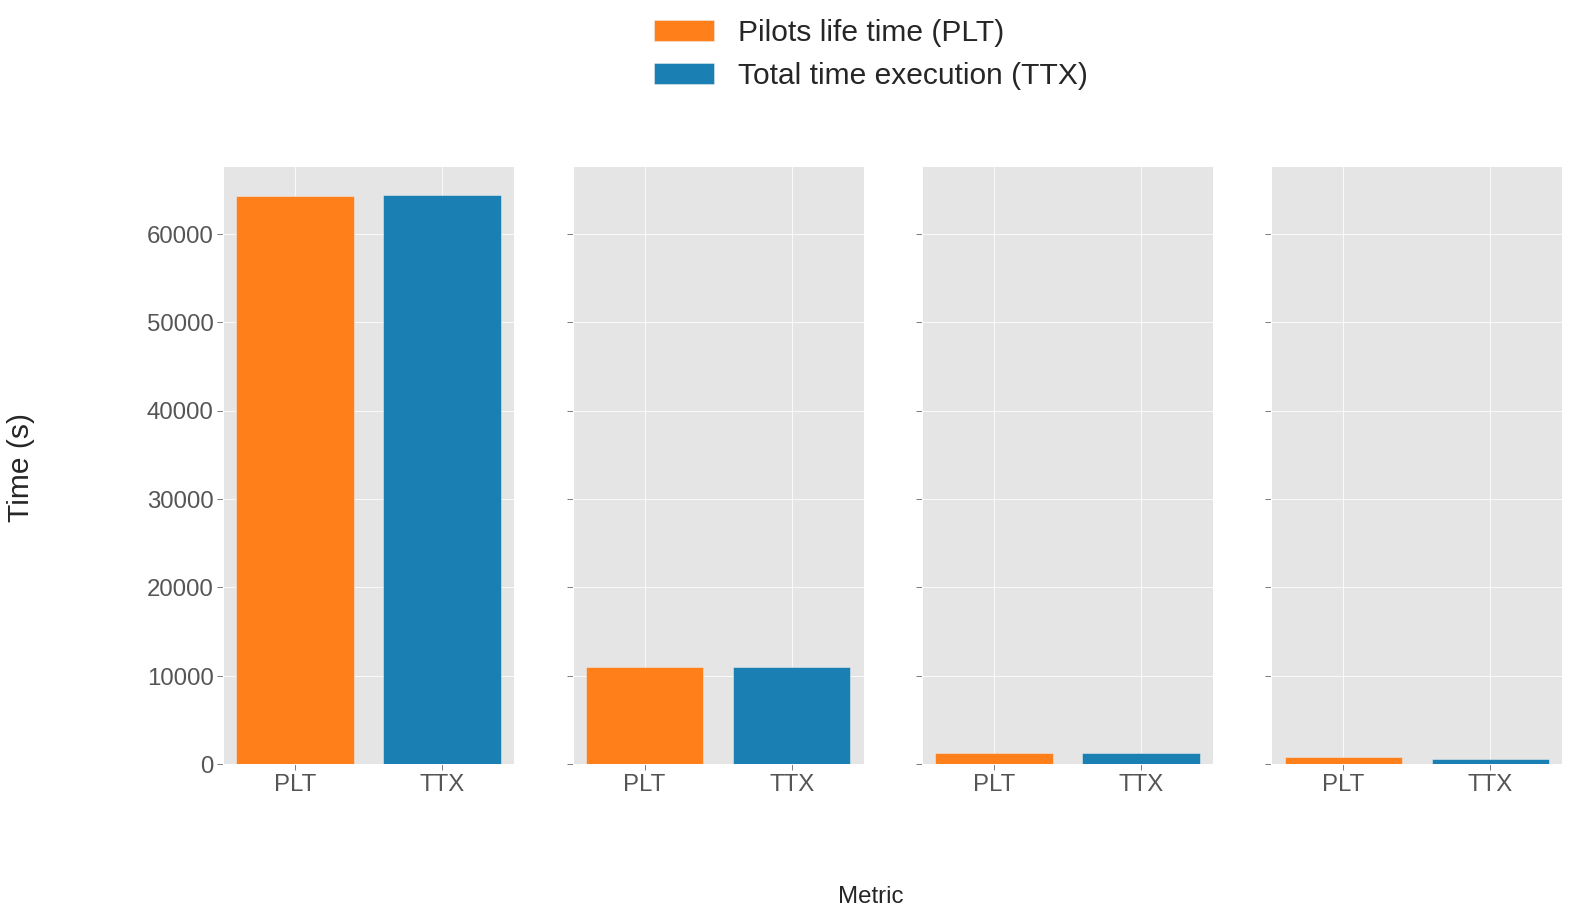

In [13]:
fwidth = 24
fhight = 11
fig, ax = plt.subplots(1, 4, sharey=True, figsize=(fwidth, fhight))



#ax.set_title('%s|%s|%s Tasks|Cores|Nodes' % (ss[sid]['nunit'],ss[sid]['ncores'], int(ss[sid]['nnodes'])),fontsize= 22)

ax[0].bar(x = 'PLT', height = PTL1N['Manager_Duration'].values[0], color = tableau20[2])
ax[0].bar(x = 'TTX', height = TTX1N['Worker_Duration'].values[0]  , color = tableau20[0])

ax[1].bar(x = 'PLT', height = PTL2N['Manager_Duration'].values[0], color = tableau20[2])
ax[1].bar(x = 'TTX', height = TTX2N['Worker_Duration'].values[0]  , color = tableau20[0])

ax[2].bar(x = 'PLT', height = PTL18N['Manager_Duration'].values[0], color = tableau20[2])
ax[2].bar(x = 'TTX', height = TTX18N['Worker_Duration'].values[0]  , color = tableau20[0])

ax[3].bar(x = 'PLT', height = PTL36N['Manager_Duration'].values[0], color = tableau20[2])
ax[3].bar(x = 'TTX', height = TTX36N['Worker_Duration'].values[0]  , color = tableau20[0])

#ax.set_xlabel('(%s)' % j, labelpad=45)

fig.text(0,  0.5 , 'Time (s)', va='center', rotation='vertical', fontsize=30)
fig.text( 0.5, -0.05, 'Metric'  , ha='center', fontsize=24)
fig.legend(['Pilots life time (PLT)', 'Total time execution (TTX)'], loc='upper center', 
           bbox_to_anchor=(0.5, 1.1), fontsize=30, ncol=1)
#plt.savefig('../figures/ss_plt_ttx.pdf', dpi=300, bbox_inches='tight')
#plt.savefig('../figures/ss_plt_ttx.png', dpi=300, bbox_inches='tight')